Desafio LDA realizado por Cristobal Novoa

# Desafío - Análisis lineal discriminante

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -
Análisis lineal discriminante.

# Requerimientos

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se
registran las siguientes observaciones:

● default: Variable Binaria. Registra si el cliente entró en morosidad o no.

● income: Ingreso promedio declarado por el cliente.

● balance: total del saldo en la cuenta de crédito.

● student: Variable binaria. Registra si el cliente es estudiante o no

# Ejercicio 1: Preparación de ambiente de trabajo

● Importe los módulos básicos para el análisis de datos.

● Importe las clases LabelEncoder, StandardScaler y LabelBinarizer de preprocessing.

● Importe las funciones train_test_split y cross_val_score de model_selection

● Importe la función classification_report de metrics.

● Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis.

● Agregue la base de datos en el ambiente de trabajo.

● Inspeccione la distribución de cada atributo.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
#Se carga csv
df = pd.read_csv('default_credit.csv')

In [3]:
#Se verifica carga de csv
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
#Se identifican valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
index      10000 non-null int64
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


No hay valores nulos en el csv

In [5]:
df.columns

Index(['index', 'default', 'student', 'balance', 'income'], dtype='object')

In [6]:
#Se elimina columna index
df = df.drop(['index'], axis=1)

In [7]:
#Se revisa el tipo de datos en dataframe
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [8]:
#Se generan listas para iterar
lista_disc = ['default', 'student']
lista_cont = ['balance', 'income'] 

# Analisis exploratorio vector objetivo

Text(0.5, 1.0, 'Countplot default')

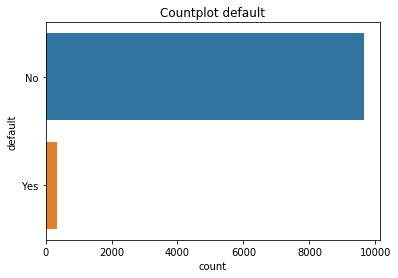

In [9]:
#Se grafica el vector objetivo
sns.countplot(y='default', data= df)
plt.title(f'Countplot default')

Se observa que hay una gran desbalance entre los morosos y los no morosos

# Analisis exploratorio atributos continuos

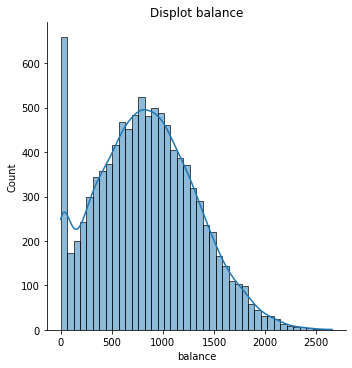

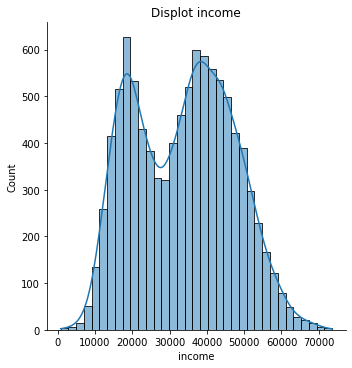

In [10]:
#Se grafican los atributos continuos
for i in lista_cont:
    sns.displot(data=df, x=i, kde=True )
    plt.title(f'Displot {i}')
    plt.show()

Se puede observar que los atributos continuos del dataframe tienen un comportamiento relativamente normal

Text(0.5, 1.0, 'Countplot student')

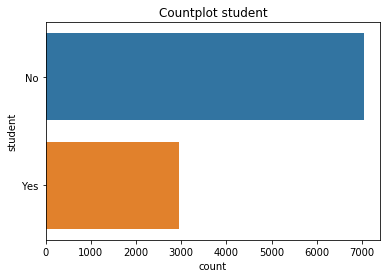

In [11]:
#Se grafica atributo student
sns.countplot(y='student', data= df)
plt.title(f'Countplot student')

# Ejercicio 2: Modelo base

● Recuerde que los modelos de sklearn no soportan datos que no sean numéricos.
Transforme los atributos pertinentes con LabelEncoder.

● Genere muestras de validación y entrenamiento, reservando un 33% de los datos como
validación.

● Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiper
parámetros. Genere métricas de evaluación utilizando classification_report.

● Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [12]:
#Se aplica LabelEncoder sobre las columnas categoricas
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

In [13]:
#Se corrobora conversion de columnas
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [14]:
#Se definen vector objetivo y matriz de entrenamiento
x = df.loc[:, 'student':'income']
y = df['default']
#Se separan muestras de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=4982)

In [15]:
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [16]:
#Se aplica genera LDA
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [17]:
#Se genera funcion para reportar las principales metricas, probabilidades a priori, medias de los atributos y varianza explicada
def report_metrics(model):
    print("Probabilidades a priori\n", model.priors_, "\n")
    print("Medias de atributos en cada clase\n", model.means_.round(2), "\n")
    print("Varianza explicada por cada discriminante\n", model.explained_variance_ratio_.round(2), "\n")

In [18]:
report_metrics(lda_model)

Probabilidades a priori
 [0.96656716 0.03343284] 

Medias de atributos en cada clase
 [[-0.   -0.06  0.  ]
 [ 0.14  1.86 -0.08]] 

Varianza explicada por cada discriminante
 [1.] 



In [19]:
#Se generan predicciones
yhat= lda_model.predict(x_test_scaled)

In [20]:
#Se reportan metricas precision, recall, f1
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3191
           1       0.78      0.23      0.35       109

    accuracy                           0.97      3300
   macro avg       0.88      0.61      0.67      3300
weighted avg       0.97      0.97      0.97      3300



In [21]:
#Se genera matriz de confusion
pd.crosstab(yhat, y_test)

default,0,1
row_0,,
0,3184,84
1,7,25


## El modelo es excelente prediciendo ceros, lo que se condice con la data que en una gran mayoria contiene este valor. 
## En tanto, es bastante mediocre prediciendo unos. 

# Ejercicio 3: Refactorización 1 - información a priori

● Dado que trabajamos con modelos generativos, podemos incluir información exógena.
Para este caso agregaremos dos distribuciones:

○ Asumamos que hay un 50/50 de morosos y no morosos.

○ Asumamos que hay un 60/40 de morosos y no morosos.

● Por cada modelo, reporte las métricas de clasificación.

In [22]:
#Se genera modelo asumiento 50/50 morosos-no morosos
lda_model_50 = LinearDiscriminantAnalysis(priors =[0.5, 0.5])
lda_model_50.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis(priors=[0.5, 0.5])

In [23]:
#Se reportan metricas
report_metrics(lda_model_50)

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.   -0.06  0.  ]
 [ 0.14  1.86 -0.08]] 

Varianza explicada por cada discriminante
 [1.] 



In [24]:
#Se generan predicciones
yhat_50= lda_model_50.predict(x_test_scaled)

In [25]:
#Se reportan precision, recall y f1 score
print(classification_report(y_test, yhat_50))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3191
           1       0.17      0.94      0.29       109

    accuracy                           0.85      3300
   macro avg       0.59      0.89      0.60      3300
weighted avg       0.97      0.85      0.90      3300



El modelo mejoro recall y empeoro su precision, en tanto, f1-score siguio empeorando en la clase 1. El modelo empeoro su desempeño en la prediccion de la clase 1 y a nivel global también 

In [26]:
#Se reporta matriz de confusion
pd.crosstab(yhat_50, y_test)

default,0,1
row_0,,
0,2702,7
1,489,102


El modelo disminuye su desempeño, por lo que en este caso incluir informacion exogena no fue efectivo.

In [27]:
#Se genera modelo 40/60 morosos-no morosos
lda_model_40 = LinearDiscriminantAnalysis(priors =[0.4, 0.6])
lda_model_40.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis(priors=[0.4, 0.6])

In [28]:
#Se reportan metricas
report_metrics(lda_model_40)

Probabilidades a priori
 [0.4 0.6] 

Medias de atributos en cada clase
 [[-0.   -0.06  0.  ]
 [ 0.14  1.86 -0.08]] 

Varianza explicada por cada discriminante
 [1.] 



In [29]:
#Se reportan precision, recall y f1
yhat_40= lda_model.predict(x_test_scaled)
print(classification_report(y_test, yhat_40))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3191
           1       0.78      0.23      0.35       109

    accuracy                           0.97      3300
   macro avg       0.88      0.61      0.67      3300
weighted avg       0.97      0.97      0.97      3300



In [30]:
#Se reporta matriz de confusion
pd.crosstab(yhat_40, y_test)

default,0,1
row_0,,
0,3184,84
1,7,25


El modelo mantiene sus metricas, por lo que añadir informacion exogena no funciono en este caso para mejorar el desempeño de la prediccion de la clase 1.

# Ejercicio 4: Refactorización 2 - oversampling

Digresión: Synthetic Over(Under)Sampling

● Por lo general podemos intentar aliviar el problema del desbalance de clases mediante
la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo
dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como
Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y
Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.

● Un contratiempo de estos métodos clásicos es que pueden replicar información
sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos,
estaremos replicando estas fallas.

● Otra solución es generar ejemplos de entrenamiento sintéticos mediante el
entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución
funciona de la siguiente forma: En función a un subconjunto de datos correspondientes
a la clase minoritaria, entrenamos algún modelo no supervisado o generativo como
Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de
los datos en el espacio de atributos de la clase específica mediante
x (x ) es un ejemplo de entrenamiento de la clase minoritaria y nuevo−ejemplo = xi + λ zi − xi
λ es un parámetro de interpolación aleatorio λ ~ Uniforme(0, 1) .

● Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre
clases. Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic
Minority Oversampling Technique). Para ello, debemos agregar el paquete a nuestro
ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge
imbalanced-learn. Incorpore SMOTE en el ambiente de trabajo con la siguiente
sintáxis from imblearn.over_sampling import SMOTE.

● Para implementar oversampling, debemos generar nuevos objetos que representan
nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente
la siguiente sintaxis:

`from imblearn.over_sampling import SMOTE`
`oversampler = SMOTE(random_state=11238, ratio='minority')`
`X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train,y_train)`

● Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente
sobre su desempeño.

In [31]:
#Se aplica oversampling sobre la categoria minoritaria
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=4982, sampling_strategy = 'minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_resample(x_train_scaled,y_train)

In [32]:
#Se aplica modelo LDA
lda_model_over = LinearDiscriminantAnalysis()
lda_model_over.fit(X_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis()

In [33]:
#Se reportan metricas
report_metrics(lda_model_over)

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.   -0.06  0.  ]
 [ 0.13  1.87 -0.07]] 

Varianza explicada por cada discriminante
 [1.] 



In [34]:
#Se reportan precision, recall y f1
yhat_over= lda_model_over.predict(x_test_scaled)
print(classification_report(y_test, yhat_over))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3191
           1       0.17      0.94      0.29       109

    accuracy                           0.85      3300
   macro avg       0.59      0.89      0.60      3300
weighted avg       0.97      0.85      0.90      3300



In [35]:
#Se reportan matriz de confusion
pd.crosstab(yhat_over, y_test)

default,0,1
row_0,,
0,2704,7
1,487,102


SMOTE mejoro recall, en desmedro de la precision del modelo. En tanto, f1 score es  menor que en el modelo sin informacion exogena y sin el uso de SMOTE. Ademas se reporta una menor cantidad de verdaderos y falsos positivos en la matriz de confusion, por tanto el desempeño del modelo sigue siendo mediocre.

# Ejercicio 5: Refactorización 3 - QDA

● Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos
aumentados artificialmente. Genere las métricas de desempeño.

● Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [36]:
#Se importa libreria QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [37]:
#Se aplica QDA sobre las muestras con los datos aumentados artificialmente
qda_model = QuadraticDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

In [38]:
#Se generan predicciones
yhat_qda = qda_model.predict(x_test_scaled)

In [39]:
#Se reportan metricas
print("Probabilidades a priori\n", qda_model.priors_, "\n")
print("Medias de atributos en cada clase\n", qda_model.means_.round(2), "\n")

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[-0.   -0.06  0.  ]
 [ 0.13  1.87 -0.07]] 



In [40]:
# Se reportan precision, recall y f1
print(classification_report(y_test, yhat_qda))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      3191
           1       0.19      0.93      0.31       109

    accuracy                           0.87      3300
   macro avg       0.59      0.90      0.62      3300
weighted avg       0.97      0.87      0.91      3300



Disminuyo la precision en favor de recall, sin embargo f1-score sigue siendo menor que el primer modelo. 

In [41]:
#Se reporta matriz de confusion
pd.crosstab(yhat_qda, y_test)

default,0,1
row_0,,
0,2757,8
1,434,101


Su tasa de verdaderos positivos y falsos positivos sigue siendo menor que la del primer modelo

# En base a la matriz de confusion el modelo inicial ofrece la mayor tasa de falsos y verdaderos positivos. Además de entregar un mejor valor de f1-score para ambas clases, teniendo valores de precision y recall buenos a nivel general. Sin embargo, ni este modelo ni ningun modelo de los generados es bueno prediciendo la clase 1 minoritaria en la data, que corresponde a aquellos clientes que entraron en morosidad. 